# Churn - Feature Engineering

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

DEBUG = False
TRAIN_TEST_SEED = 76

In [2]:
import os
for d in ['src','data','output']: os.makedirs(d, exist_ok=True)

In [3]:
from IPython.display import Markdown, display

In [4]:
# utility funciton for typesetting percentages
display_fraction = lambda n,d: (n/d*100, n, d)

## Load and Prepare the Data 

I have made a slight change of naming convention which will simply code below - and also avoid mistakes in lab sessions when I rerun cells out of order to demo parts of the code.   Rather than using __df__ to store the full dataset I will use __df_all__, and use __df__ as an alias for various dataset as needed - see [Feature Engineering](#Feature_Engineering). So will try to follow naming convention:

 * __df__ alias for various datasets (trwated link a tmp variable, more later). 
 * __df_all__ full dataset after loading and prepped (columns renamed, value recoded).
 * __df_model__ dataset with target and a subset of the original attributes that may appear in model or be used to construct other attributes.
 * __df_train__ dataset 
 * __df_test__ dataset 

 


In [5]:
df_churn = pd.read_csv("data/churn.csv")
print("Churn", df_churn.shape)
df_states = pd.read_csv("data/states.csv")
print("States", df_states.shape)

df_all = df_churn.merge(df_states, on="State")

message = (" * Data set consists of %d cases (rows) with %s attributes (cols) and a single target."  
% (df_all.shape[0], df_all.shape[1]-1))
Markdown(message)

Churn (3333, 20)
States (52, 4)


 * Data set consists of 3333 cases (rows) with 22 attributes (cols) and a single target.

## Pre-Processing Data

In [6]:
target = "Churn"
attributes = df_all.columns.tolist()
attributes.remove(target) 

df_model = df_all.loc[:, attributes + [target]]

### Side Note - Down-Sampling 

When a dataset is imbalanced, one can generate a balanced dataset by taking a sample of the larger set.

In [7]:
#df_balanced_down_sampling = pd.concat ([
#    df_all[df_all.Churn==0].sample(n=sum(df_all.Churn==1), random_state=TRAIN_TEST_SEED),
#    df_all[df_all.Churn==1]])

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.40, random_state=TRAIN_TEST_SEED)
print(df_train.shape, df_test.shape)

(1999, 23) (1334, 23)


In [9]:
# save copy of df_train for use with dtale
df_train.to_csv("data/dt_train.csv", index=False)

## Feature_Engineering 

Features engineering and selection decision is carried out on __df_train__ ONLY, but resulting operations should be applied to both __df_train__ and __df_test__. The simplest way to do this (without repeating code) is to apply operations to __df_model__ and repeat the train/test split USING THE SAME SEED.

### New Feature - Cranky Triskaidekaphobias

Would a feature indicating customers who complain and avoid the number 13 be useful in predicting Churn?

This is a silly feature, but illustrates the general procedure

In [10]:
my_query = df_train.query('CustServ_Calls>0 & Day_Calls!=13 & Eve_Calls!=13 & Night_Calls!=13 & Intl_Calls!=13')
my_query.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Latitude,Longitude,Name,Churn
3219,CT,106,510,0,1,33,81.6,120,13.87,235.6,85,20.03,150.9,113,6.79,9.9,4,2.67,1,41.603221,-73.087749,Connecticut,0
873,MT,130,408,0,1,19,152.9,87,25.99,213.2,99,18.12,205.3,114,9.24,10.8,6,2.92,2,46.879682,-110.362566,Montana,0
1662,HI,166,408,0,0,0,181.4,108,30.84,253.8,54,21.57,112.3,94,5.05,11.6,6,3.13,1,19.898682,-155.665857,Hawaii,0
973,ID,85,408,0,1,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,44.068202,-114.742041,Idaho,0
602,WV,75,415,0,0,0,111.7,121,18.99,237.3,119,20.17,253.5,110,11.41,13.1,6,3.54,1,38.597626,-80.454903,West Virginia,0


In [11]:
df_model["Cranky_Triskaidekaphobias"] = df_model.apply (lambda row: (row.CustServ_Calls>0 
            and row.Day_Calls!=13 and row.Eve_Calls!=13 
            and row.Night_Calls!=13 and row.Intl_Calls!=13), axis=1)

In [12]:
df_model.Cranky_Triskaidekaphobias.value_counts()

True     2626
False     707
Name: Cranky_Triskaidekaphobias, dtype: int64

### New Feature - ????

### New Feature - ????

### New Feature - ????

### New Feature - ????

### New Feature - ????

## Model Training

In [13]:
print (df_model.columns.values)

['State' 'Account_Length' 'Area_Code' 'Intl_Plan' 'VMail_Plan'
 'VMail_Message' 'Day_Mins' 'Day_Calls' 'Day_Charge' 'Eve_Mins'
 'Eve_Calls' 'Eve_Charge' 'Night_Mins' 'Night_Calls' 'Night_Charge'
 'Intl_Mins' 'Intl_Calls' 'Intl_Charge' 'CustServ_Calls' 'Latitude'
 'Longitude' 'Name' 'Churn' 'Cranky_Triskaidekaphobias']


### Train-Test Split

REPEAT train/test split from above so that both data subsets have the modified feature set.

In [14]:
df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.40, random_state=TRAIN_TEST_SEED)
attributes = df_model.columns.tolist()
attributes.remove(target)
for c in ["Churn", "State", "Name", "Longitude", "Latitude"]: 
    if c in attributes: attributes.remove(c)

print(attributes)

['Account_Length', 'Area_Code', 'Intl_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Cranky_Triskaidekaphobias']


In [15]:
df_model.loc[:,attributes].head()

,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Cranky_Triskaidekaphobias
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,True
1,70,408,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,True
2,92,408,1,0,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
3,137,408,0,0,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,True
4,132,415,0,0,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,True


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(df_train.loc[:,attributes].astype(float))
y_train = df_train.Churn.values

X_test = scaler.transform(df_test.loc[:,attributes].astype(float))
y_test = df_test.Churn.values

### Evaluation

We used accuracy metric last week.  This week we will focus on recall - it is probably more relevant in this case and we want to focus on identifying as many Churn customers as possible.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_auc_score

### Training - First Iteration

Just a few of our standard classifiers, using default/semi-sane parameters.

In [18]:
models = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models.append( {"name": "LogisticRegression", "ref": LogisticRegression(solver="lbfgs")} )

# Support Vector Machines
from sklearn.svm import SVC
models.append( {"name": "SVC", "ref": SVC(gamma="scale")} )

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models.append( {"name": "DT (pruned=4)", "ref": DecisionTreeClassifier(criterion='entropy', max_depth=4)} )

print("Models:")
for model in models:
    print(f"    {model['name']:30} {model['ref']}")

Models:
    LogisticRegression             LogisticRegression()
    SVC                            SVC()
    DT (pruned=4)                  DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [19]:
for model in models:
    
    crossval_scores = cross_val_score(model["ref"], X_train, y_train, scoring='recall', cv=10)
    print ("\nModel %s" % model["name"])
    print ("\tCV scores %s" % [f"{s:.4f}" for s in crossval_scores])
    print ("\tmean=%.4f std=%.4f" % (crossval_scores.mean(), crossval_scores.std()))


Model LogisticRegression
	CV scores ['0.1724', '0.2069', '0.2759', '0.1724', '0.3103', '0.3103', '0.1724', '0.1379', '0.3103', '0.1034']
	mean=0.2172 std=0.0740

Model SVC
	CV scores ['0.2069', '0.5172', '0.3103', '0.3793', '0.3793', '0.5862', '0.3448', '0.3448', '0.4828', '0.3793']
	mean=0.3931 std=0.1037

Model DT (pruned=4)
	CV scores ['0.5517', '0.5172', '0.6207', '0.5862', '0.4483', '0.4483', '0.4483', '0.4138', '0.4483', '0.4138']
	mean=0.4897 std=0.0703


### Feature Selection

In [20]:
print("Number of features starting:", len(attributes))

Number of features starting: 19


Optimal number of features : 15


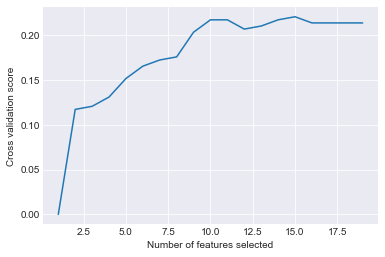

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

model = models[0]["ref"]

rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2), scoring="recall")
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
# list of features selected
attributes_selected = np.array(attributes)[rfecv.support_].tolist()
attributes_selected

['Intl_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Charge',
 'Night_Mins',
 'Night_Charge',
 'Intl_Mins',
 'Intl_Calls',
 'Intl_Charge',
 'CustServ_Calls',
 'Cranky_Triskaidekaphobias']

### Training - After Feature Selection

In [23]:
display(df_model.loc[:, attributes_selected + [target]])

# normalise 
X_train = scaler.fit_transform(df_train.loc[:,attributes_selected].astype(float))
y_train = df_train.Churn.values
X_test = scaler.transform(df_test.loc[:,attributes_selected].astype(float))
y_test = df_test.Churn.values

for model in models:
    
    crossval_scores = cross_val_score(model["ref"], X_train, y_train, scoring='recall', cv=5)
    print ("\nModel %s" % model["name"])
    print ("\tCV scores %s" % [f"{s:.4f}" for s in crossval_scores])
    print ("\tmean=%.4f std=%.4f" % (crossval_scores.mean(), crossval_scores.std()))

,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Cranky_Triskaidekaphobias,Churn
0,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,True,0
1,0,0,0,232.1,122,39.46,292.3,24.85,201.2,9.05,0.0,0,0.00,3,True,0
2,1,0,0,62.6,111,10.64,180.6,15.35,221.7,9.98,10.4,2,2.81,1,True,1
3,0,0,0,205.9,88,35.00,209.3,17.79,289.9,13.05,14.5,4,3.92,2,True,0
4,0,0,0,83.4,110,14.18,232.2,19.74,146.7,6.60,7.6,5,2.05,1,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,38,193.0,106,32.81,153.6,13.06,260.4,11.72,7.4,5,2.00,2,True,0
3329,0,1,33,177.1,100,30.11,194.0,16.49,253.4,11.40,5.2,5,1.40,1,True,0
3330,0,1,24,225.5,119,38.34,182.0,15.47,270.9,12.19,9.4,2,2.54,3,True,0
3331,0,0,0,227.4,67,38.66,248.0,21.08,61.4,2.76,7.8,6,2.11,1,True,0



Model LogisticRegression
	CV scores ['0.1724', '0.2241', '0.2759', '0.1379', '0.2069']
	mean=0.2034 std=0.0468

Model SVC
	CV scores ['0.4310', '0.4655', '0.5862', '0.5000', '0.4828']
	mean=0.4931 std=0.0518

Model DT (pruned=4)
	CV scores ['0.5690', '0.6034', '0.5000', '0.4138', '0.4655']
	mean=0.5103 std=0.0686


In [24]:
!say "done"